In [39]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils
from tensorflow.keras.preprocessing import image


In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [15]:
x_train.shape

(60000, 28, 28)

In [16]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

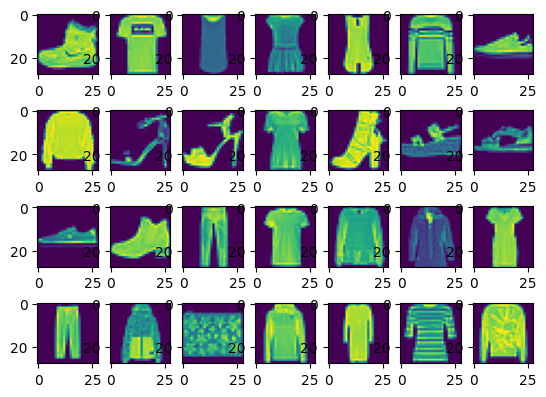

In [17]:
for i in range(28):
    plt.subplot(4,7,i+1)
    plt.imshow(x_train[i])
plt.show;

In [18]:
input_shape = (28, 28,1)

In [19]:
model_1 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        # Conv2D(64, padding = 'same', kernel_size = (3,3), activation = 'relu' ),
        # MaxPooling2D( (2,2), strides = 2),
        Flatten(),  # перевод в одномерный массив
        Dense(50, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [20]:
model_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [21]:
x_train = x_train / 255
x_test = x_test / 255
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [22]:
%%time

history = model_1.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.4030 - accuracy: 0.8577 - val_loss: 0.3175 - val_accuracy: 0.8876
Epoch 2/5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2730 - accuracy: 0.9017 - val_loss: 0.3035 - val_accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2322 - accuracy: 0.9151 - val_loss: 0.2710 - val_accuracy: 0.9014
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2052 - accuracy: 0.9260 - val_loss: 0.2581 - val_accuracy: 0.9053
Epoch 5/5
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1835 - accuracy: 0.9325 - val_loss: 0.2662 - val_accuracy: 0.9078
CPU times: total: 9min 52s
Wall time: 2min 11s


In [23]:
model_2 = keras.Sequential(
    [keras.Input(shape=input_shape), Flatten(), Dense(50, activation="relu"), Dense(10, activation="softmax")]
)

In [24]:
model_2.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [25]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5322 - accuracy: 0.8167 - val_loss: 0.4735 - val_accuracy: 0.8332
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4016 - accuracy: 0.8580 - val_loss: 0.4431 - val_accuracy: 0.8425
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3639 - accuracy: 0.8694 - val_loss: 0.4524 - val_accuracy: 0.8377
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3434 - accuracy: 0.8767 - val_loss: 0.4310 - val_accuracy: 0.8491
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3256 - accuracy: 0.8838 - val_loss: 0.3813 - val_accuracy: 0.8633
CPU times: total: 38.1 s
Wall time: 21.7 s


In [26]:
model_3 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(64, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Flatten(),  # перевод в одномерный массив
        Dense(50, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [27]:
model_3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [28]:
%%time

history = model_3.fit(x_train, y_train_cat, batch_size=32, epochs=5,validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.4349 - accuracy: 0.8448 - val_loss: 0.3545 - val_accuracy: 0.8667
Epoch 2/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2900 - accuracy: 0.8954 - val_loss: 0.2854 - val_accuracy: 0.8969
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2457 - accuracy: 0.9115 - val_loss: 0.2896 - val_accuracy: 0.8983
Epoch 4/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.2143 - accuracy: 0.9202 - val_loss: 0.2574 - val_accuracy: 0.9077
Epoch 5/5
1875/1875 [==============================] - 44s 23ms/step - loss: 0.1918 - accuracy: 0.9287 - val_loss: 0.2429 - val_accuracy: 0.9116
CPU times: total: 18min 47s
Wall time: 3min 41s


In [29]:
model_4 = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        Conv2D(32, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(64, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Conv2D(128, padding="same", kernel_size=(3, 3), activation="relu"),
        MaxPooling2D((2, 2), strides=2),
        Flatten(),  # перевод в одномерный массив
        Dense(128, activation="relu"),  # количество входных нейронов
        Dense(10, activation="softmax"),  # количество выходных нейронов
    ]
)

In [30]:
model_4.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [31]:
%%time

history = model_4.fit(x_train, y_train_cat, batch_size=32, epochs=10,validation_data =(x_test, y_test_cat))

Epoch 1/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.4205 - accuracy: 0.8467 - val_loss: 0.3290 - val_accuracy: 0.8757
Epoch 2/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2725 - accuracy: 0.9012 - val_loss: 0.2821 - val_accuracy: 0.8954
Epoch 3/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2273 - accuracy: 0.9165 - val_loss: 0.2464 - val_accuracy: 0.9099
Epoch 4/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.1988 - accuracy: 0.9267 - val_loss: 0.2319 - val_accuracy: 0.9150
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1708 - accuracy: 0.9372 - val_loss: 0.2535 - val_accuracy: 0.9093
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1481 - accuracy: 0.9448 - val_loss: 0.2328 - val_accuracy: 0.9161
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1299 - accuracy: 0.9510 - val_loss: 0.2358 -

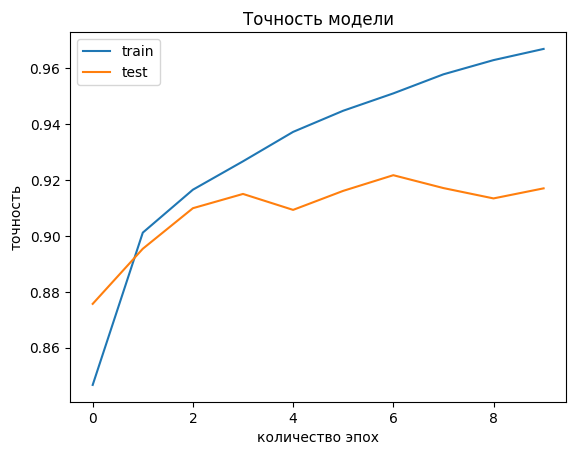

In [32]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Точность модели")
plt.ylabel("точность")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

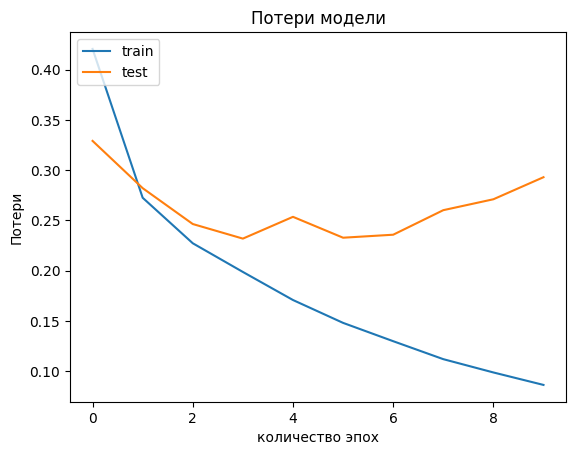

In [33]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Потери модели")
plt.ylabel("Потери")
plt.xlabel("количество эпох")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [34]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 3, 3, 128)       

In [ ]:
keras.utils.plot_model(model_4, to_file="model.png", show_shapes=True)